In [32]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from util import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
har_accel_df = read_sensor_data('accel')
har_gyro_df = read_sensor_data('gyro')

In [3]:
display(har_accel_df.head())
display(har_gyro_df.head())

,subject,activity,timestamp,accel_x,accel_y,accel_z
0,1600,walking,90426708196641,7.091625,-0.591667,8.195502
1,1600,walking,90426757696641,4.972757,-0.158317,6.696732
2,1600,walking,90426807196641,3.253720,-0.191835,6.107758
3,1600,walking,90426856696641,2.801216,-0.155922,5.997625
4,1600,walking,90426906196641,3.770868,-1.051354,7.731027


,subject,activity,timestamp,gyro_x,gyro_y,gyro_z
0,1600,walking,90426757696641,0.314944,-1.022277,-0.309962
1,1600,walking,90426807196641,0.387382,-0.618541,-0.048972
2,1600,walking,90426856696641,0.070999,-0.209480,-0.195978
3,1600,walking,90426906196641,0.037975,0.254976,-0.156563
4,1600,walking,90426955696641,0.073129,0.719431,-0.001035


In [4]:
display(har_accel_df.shape)
display(har_gyro_df.shape)

(1053141, 6)

(949933, 6)

In [5]:
if not (os.path.exists('data/accel.csv') or os.path.exists('data/gyro.csv')):
    os.makedirs('data', exist_ok=True)
    har_accel_df.to_csv('data/accel.csv', index=False)
    har_gyro_df.to_csv('data/gyro.csv', index=False)

## We can see that the data is not consistent. Samples exist for which both sensor readings are not present. Let's merge the dataframe to solve this problem.

In [6]:
if not os.path.exists('data/har.csv'):
    os.makedirs('data', exist_ok=True)
    har_df = pd.merge(har_accel_df, har_gyro_df, on=['subject', 'activity', 'timestamp'], how='inner')
    har_df.to_csv('data/har.csv', index=False)
else:
    har_df = pd.read_csv('data/har.csv')
    
display(har_df.head())
display(har_df.shape)

,subject,activity,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z
0,1600,walking,90426757696641,4.972757,-0.158317,6.696732,0.314944,-1.022277,-0.309962
1,1600,walking,90426807196641,3.253720,-0.191835,6.107758,0.387382,-0.618541,-0.048972
2,1600,walking,90426856696641,2.801216,-0.155922,5.997625,0.070999,-0.209480,-0.195978
3,1600,walking,90426906196641,3.770868,-1.051354,7.731027,0.037975,0.254976,-0.156563
4,1600,walking,90426955696641,4.661511,0.169689,9.684695,0.073129,0.719431,-0.001035


(938949, 9)

In [7]:
har_df = har_df.drop_duplicates()

In [8]:
har_df.shape

(884901, 9)

In [9]:
with pd.option_context('display.max_rows', None):
    display(pd.pivot_table(har_df, index=['subject', 'activity'], aggfunc='count'))

accel_x  accel_y  accel_z  gyro_x  gyro_y  gyro_z  timestamp
subject activity                                                              
1600    jogging      3604     3604     3604    3604    3604    3604       3604
        sitting      3604     3604     3604    3604    3604    3604       3604
        stairs       3604     3604     3604    3604    3604    3604       3604
        standing     3604     3604     3604    3604    3604    3604       3604
        walking      3603     3603     3603    3603    3603    3603       3603
1601    jogging      3602     3602     3602    3602    3602    3602       3602
        sitting      3601     3601     3601    3601    3601    3601       3601
        stairs       3601     3601     3601    3601    3601    3601       3601
        standing     3602     3602     3602    3602    3602    3602       3602
        walking      3601     3601     3601    3601    3601    3601       3601
1602    jogging      3603     3603     3603    3603    3603    3603       3603
        sitting      3603     3603     3603    3603    3603    3603       3603
        stairs       3603     3603     3603    3603    3603    3603       3603
        standing     3699     3699     3699    3699    3699    3699       3699
        walking      3603     3603     3603    3603    3603    3603       3603
1603    jogging      3602     3602     3602    3602    3602    3602       3602
        sitting      3603     3603     3603    3603    3603    3603       3603
        stairs       3602     3602     3602    3602    3602    3602       3602
        standing     3601     3601     3601    3601    3601    3601       3601
        walking      3603     3603     3603    3603    3603    3603       3603
1604    jogging      3603     3603     3603    3603    3603    3603       3603
        sitting      3603     3603     3603    3603    3603    3603       3603
        stairs       3604     3604     3604    3604    3604    3604       3604
        standing     3603     3603     3603    3603    3603    3603       3603
        walking      3603     3603     3603    3603    3603    3603       3603
1605    jogging      3603     3603     3603    3603    3603    3603       3603
        sitting      3602     3602     3602    3602    3602    3602       3602
        stairs       3602     3602     3602    3602    3602    3602       3602
        standing     3602     3602     3602    3602    3602    3602       3602
        walking      3603     3603     3603    3603    3603    3603       3603
1606    jogging      3603     3603     3603    3603    3603    3603       3603
        sitting      3603     3603     3603    3603    3603    3603       3603
        stairs       3603     3603     3603    3603    3603    3603       3603
        standing     3603     3603     3603    3603    3603    3603       3603
        walking      3603     3603     3603    3603    3603    3603       3603
1607    jogging      3602     3602     3602    3602    3602    3602       3602
        sitting      3601     3601     3601    3601    3601    3601       3601
        stairs       3602     3602     3602    3602    3602    3602       3602
        standing     3602     3602     3602    3602    3602    3602       3602
        walking      3603     3603     3603    3603    3603    3603       3603
1608    jogging      3603     3603     3603    3603    3603    3603       3603
        sitting      3603     3603     3603    3603    3603    3603       3603
        stairs       3603     3603     3603    3603    3603    3603       3603
        standing     3603     3603     3603    3603    3603    3603       3603
        walking      3603     3603     3603    3603    3603    3603       3603
1609    jogging      3603     3603     3603    3603    3603    3603       3603
        sitting      3603     3603     3603    3603    3603    3603       3603
        stairs       3603     3603     3603    3603    3603    3603       3603
        standing     3603     3603     3603    3603    3603    3603 

## Data for 1637, 1638, 1639, 1640 looks particulary odd

In [10]:
def plot_sensor_readings(sensor, subject):
    for activity in ['sitting', 'standing', 'walking', 'jogging', 'stairs']:
        data = har_df.query(f'subject == {subject} and activity == "{activity}"')[1024:2048]
        if len(data) == 0:
            continue
        fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(25, 10), sharex=True)
        plot_axis(ax0, data['timestamp'], data[sensor + '_x'], 'X-Axis')
        plot_axis(ax1, data['timestamp'], data[sensor + '_y'], 'Y-Axis')
        plot_axis(ax2, data['timestamp'], data[sensor + '_z'], 'Z-Axis')
        plt.subplots_adjust(hspace=0.2)
        fig.suptitle(sensor + ': ' + activity)
        plt.subplots_adjust(top=0.90)
        plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

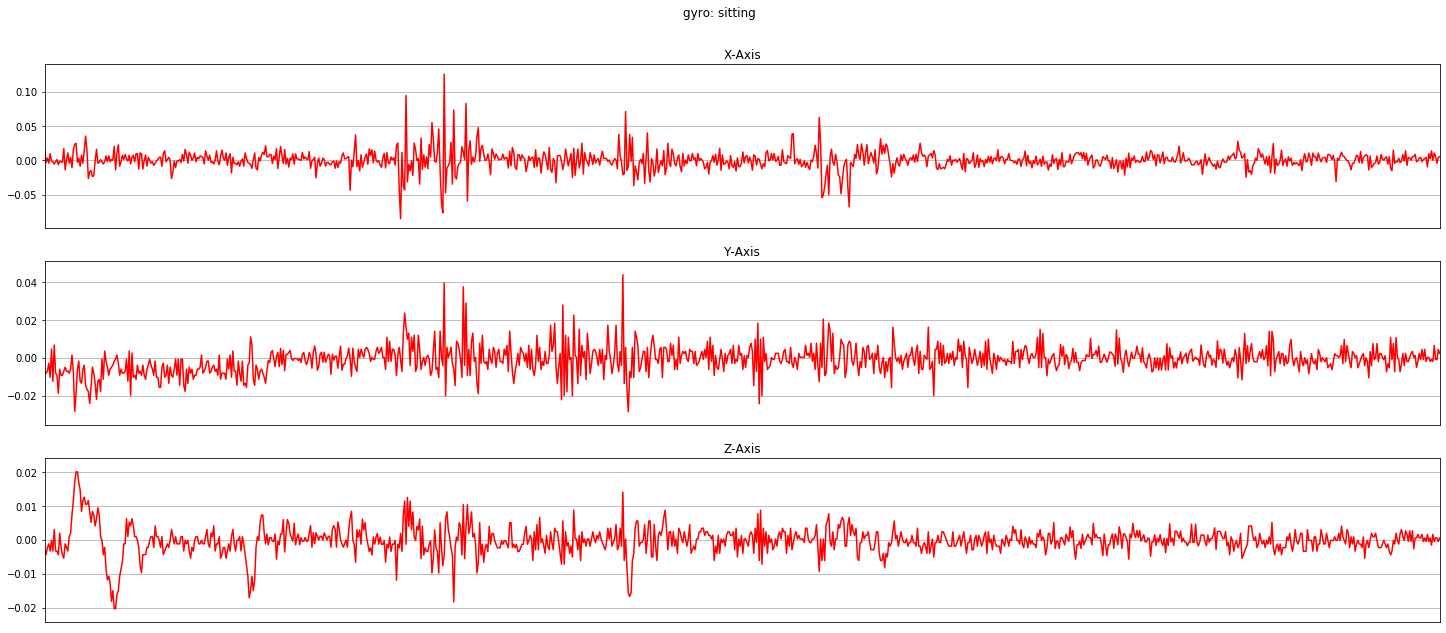

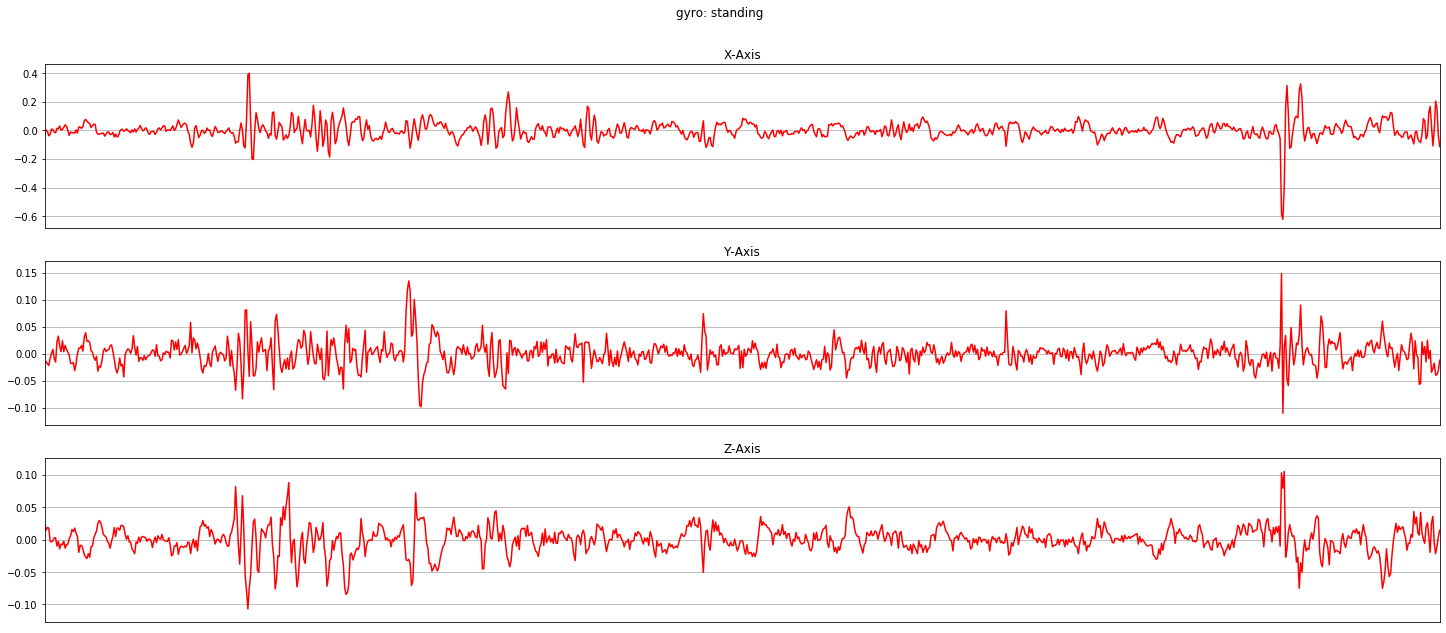

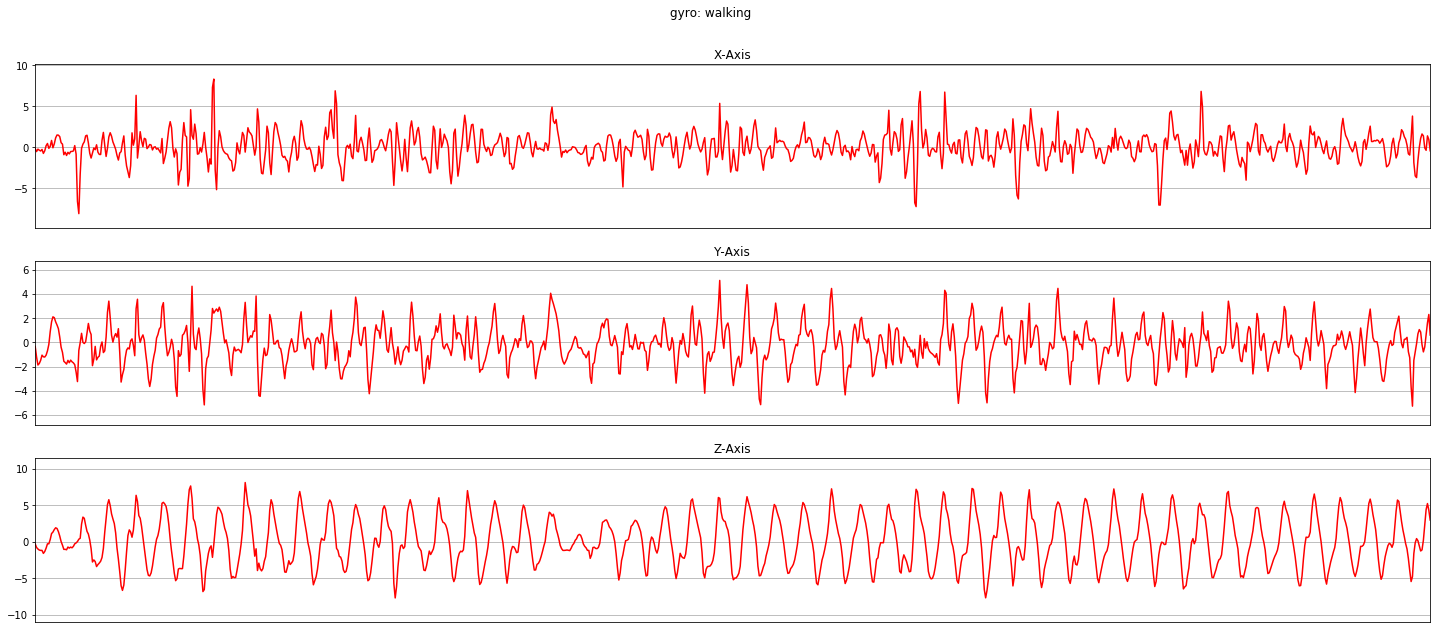

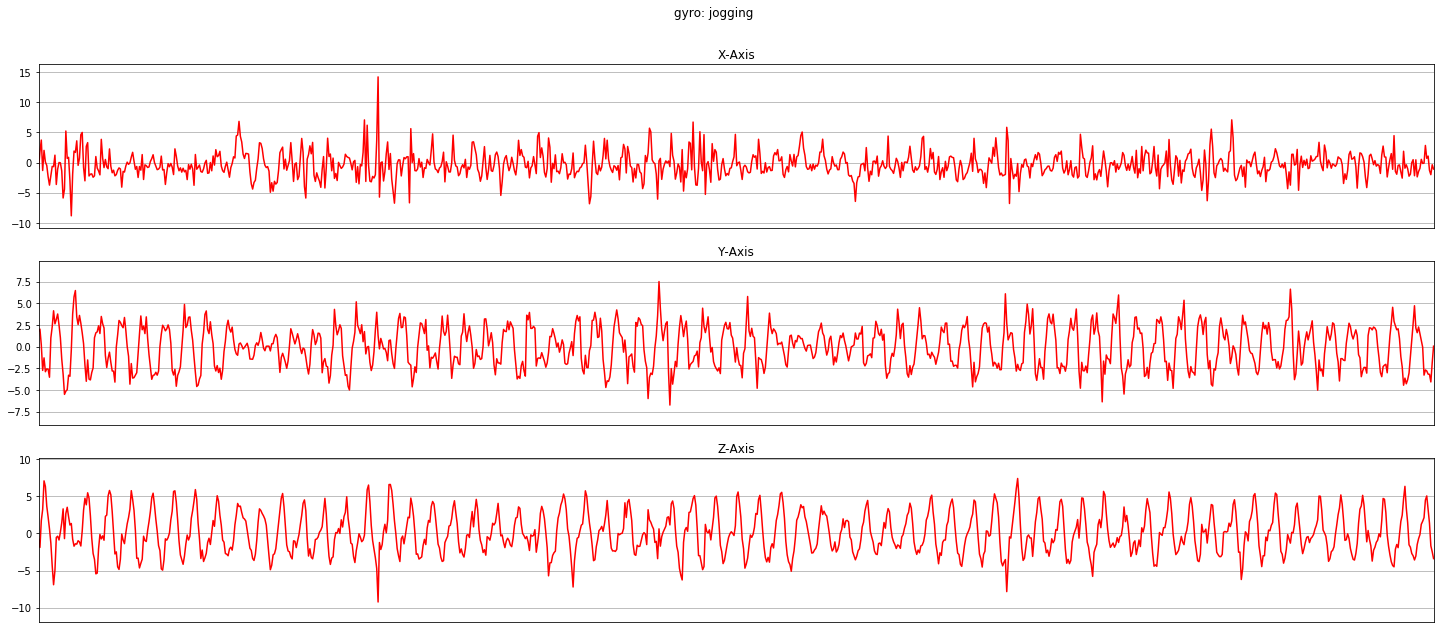

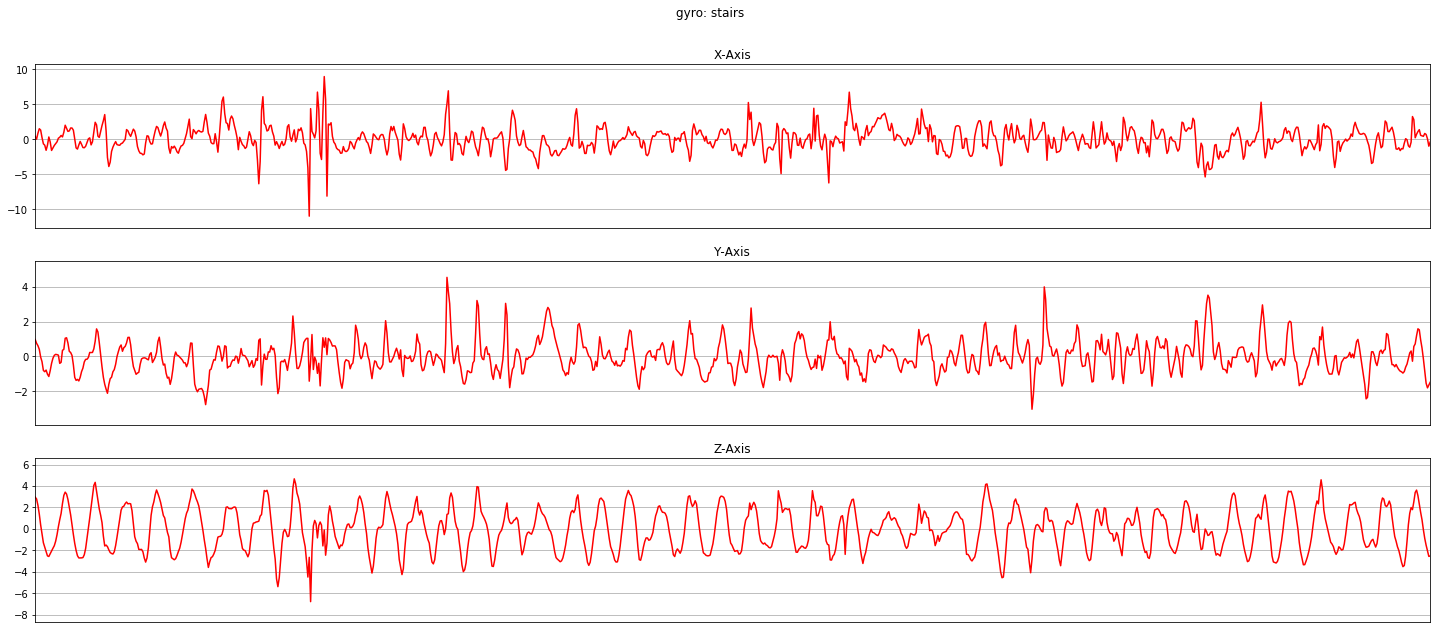

In [114]:
plot_sensor_readings('gyro', 1600)

## There are numerous missing data points for the above mentioned subjects. Let's drop them.

In [12]:
har_df = har_df.loc[~har_df['subject'].isin([1637, 1638, 1639, 1640])].reset_index()

In [13]:
with pd.option_context('display.max_rows', None):
    display(pd.pivot_table(har_df, index=['subject', 'activity'], aggfunc='count'))

accel_x  accel_y  accel_z  gyro_x  gyro_y  gyro_z  index  \
subject activity                                                             
1600    jogging      3604     3604     3604    3604    3604    3604   3604   
        sitting      3604     3604     3604    3604    3604    3604   3604   
        stairs       3604     3604     3604    3604    3604    3604   3604   
        standing     3604     3604     3604    3604    3604    3604   3604   
        walking      3603     3603     3603    3603    3603    3603   3603   
1601    jogging      3602     3602     3602    3602    3602    3602   3602   
        sitting      3601     3601     3601    3601    3601    3601   3601   
        stairs       3601     3601     3601    3601    3601    3601   3601   
        standing     3602     3602     3602    3602    3602    3602   3602   
        walking      3601     3601     3601    3601    3601    3601   3601   
1602    jogging      3603     3603     3603    3603    3603    3603   3603   
        sitting      3603     3603     3603    3603    3603    3603   3603   
        stairs       3603     3603     3603    3603    3603    3603   3603   
        standing     3699     3699     3699    3699    3699    3699   3699   
        walking      3603     3603     3603    3603    3603    3603   3603   
1603    jogging      3602     3602     3602    3602    3602    3602   3602   
        sitting      3603     3603     3603    3603    3603    3603   3603   
        stairs       3602     3602     3602    3602    3602    3602   3602   
        standing     3601     3601     3601    3601    3601    3601   3601   
        walking      3603     3603     3603    3603    3603    3603   3603   
1604    jogging      3603     3603     3603    3603    3603    3603   3603   
        sitting      3603     3603     3603    3603    3603    3603   3603   
        stairs       3604     3604     3604    3604    3604    3604   3604   
        standing     3603     3603     3603    3603    3603    3603   3603   
        walking      3603     3603     3603    3603    3603    3603   3603   
1605    jogging      3603     3603     3603    3603    3603    3603   3603   
        sitting      3602     3602     3602    3602    3602    3602   3602   
        stairs       3602     3602     3602    3602    3602    3602   3602   
        standing     3602     3602     3602    3602    3602    3602   3602   
        walking      3603     3603     3603    3603    3603    3603   3603   
1606    jogging      3603     3603     3603    3603    3603    3603   3603   
        sitting      3603     3603     3603    3603    3603    3603   3603   
        stairs       3603     3603     3603    3603    3603    3603   3603   
        standing     3603     3603     3603    3603    3603    3603   3603   
        walking      3603     3603     3603    3603    3603    3603   3603   
1607    jogging      3602     3602     3602    3602    3602    3602   3602   
        sitting      3601     3601     3601    3601    3601    3601   3601   
        stairs       3602     3602     3602    3602    3602    3602   3602   
        standing     3602     3602     3602    3602    3602    3602   3602   
        walking      3603     3603     3603    3603    3603    3603   3603   
1608    jogging      3603     3603     3603    3603    3603    3603   3603   
        sitting      3603     3603     3603    3603    3603    3603   3603   
        stairs       3603     3603     3603    3603    3603    3603   3603   
        standing     3603     3603     3603    3603    3603    3603   3603   
        walking      3603     3603     3603    3603    3603    3603   3603   
1609    jogging      3603     3603     3603    3603    3603    3603   3603   
        sitting      3603     3603     3603    3603    3603    3603   3603   
        stairs       3603     3603     3603    3603    3603    3603   3603   
        standing     3603     3603     3603    3603    3603    3603   3603   
        walking      3603     3603     3

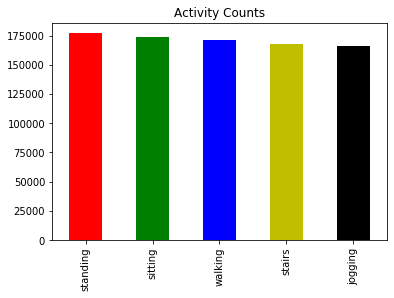

In [16]:
har_df['activity'].value_counts().plot(kind='bar', title='Activity Counts', colors=['r', 'g', 'b', 'y', 'k'])

In [134]:
SEQ_LEN = 60 # corresponding to 3 secs (20 * 3). Data was sampled at 20 Hz.
COLUMNS = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']
DIMS = len(COLUMNS)

In [135]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

scaler = MinMaxScaler()
har_df[COLUMNS] = scaler.fit_transform(har_df[COLUMNS])

encoder = LabelEncoder()
har_df['activity'] = encoder.fit_transform(har_df['activity'])

In [136]:
X = []
y = []
    
for index, data in har_df.groupby(['subject', 'activity'], sort=False):
    data = data[COLUMNS].values
    label = index[1]
    for i in range(0, len(data) - SEQ_LEN, SEQ_LEN):
        X.append(np.expand_dims(data[i:i+SEQ_LEN], axis=0))
        y.append(label)

In [137]:
X = np.concatenate(X)
y = np.asarray(y)

In [138]:
import numpy as np
import pandas as pd 
import tensorflow as tf

In [139]:
tf.__version__

'2.1.0'

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [178]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, input_shape=(SEQ_LEN, DIMS)),
#     tf.keras.layers.MaxPool1D(),
#     tf.keras.layers.Conv1D(filters=64, kernel_size=3),
#     tf.keras.layers.MaxPool1D(),
#     tf.keras.layers.LSTM(units=64, return_sequences=True),
    tf.keras.layers.LSTM(units=64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='softmax')
])

# This function keeps the learning rate at 0.001 for the first ten epochs
# and decreases it exponentially after that.
def scheduler(epoch):
    if epoch < 10:
        return 0.001
    return 0.001 * tf.math.exp(0.1 * (10 - epoch))

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 58, 32)            608       
_________________________________________________________________
lstm_20 (LSTM)               (None, 64)                24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 645       
Total params: 34,405
Trainable params: 34,405
Non-trainable params: 0
_________________________________________________________________


In [182]:
%%timeit
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=100, 
                    validation_split=0.1, 
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10), 
                        tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3)
                    ])

Train on 10230 samples, validate on 1137 samples
Epoch 1/100
10230/10230 [==============================] - 5s 519us/sample - loss: 0.1803 - accuracy: 0.9283 - val_loss: 0.5711 - val_accuracy: 0.8179
Epoch 2/100
10230/10230 [==============================] - 5s 505us/sample - loss: 0.1804 - accuracy: 0.9326 - val_loss: 0.6061 - val_accuracy: 0.8091
Epoch 3/100
10230/10230 [==============================] - 5s 506us/sample - loss: 0.1826 - accuracy: 0.9308 - val_loss: 0.5725 - val_accuracy: 0.8056
Epoch 4/100
10230/10230 [==============================] - 5s 506us/sample - loss: 0.1778 - accuracy: 0.9306 - val_loss: 0.7183 - val_accuracy: 0.8012
Epoch 5/100
10230/10230 [==============================] - 5s 507us/sample - loss: 0.1708 - accuracy: 0.9327 - val_loss: 0.8271 - val_accuracy: 0.7792
Epoch 6/100
10230/10230 [==============================] - 5s 507us/sample - loss: 0.1735 - accuracy: 0.9313 - val_loss: 0.8607 - val_accuracy: 0.7581
Epoch 7/100
10230/10230 [====================

KeyboardInterrupt: 

In [183]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

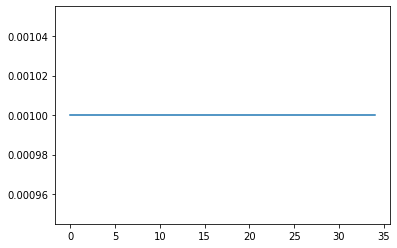

In [184]:
plt.plot(history.history['lr'], label='lr')

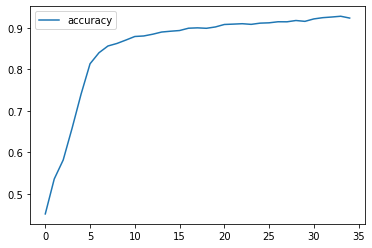

In [187]:
fig, ax = plt.subplots()

accuracy = history.history['accuracy']
loss = history.history['loss']

plt.plot(accuracy, label='accuracy')
# plt.plot(loss, label='loss')

plt.legend()
plt.show()

In [154]:
model.metrics_names

['loss', 'accuracy']

In [155]:
eval_loss, eval_accuracy = model.evaluate(X_test, y_test)

2842/2842 [==============================] - 0s 134us/sample - loss: 0.6391 - accuracy: 0.8191


In [156]:
eval_accuracy

0.81914145